## Useful Links

[500000 Elon Musk Tweets](https://pub.towardsai.net/unsupervised-sentiment-analysis-with-real-world-data-500-000-tweets-on-elon-musk-3f0653135558)



In [1]:
!pip install snscrape
!pip install wordcloud
!pip install emot
!pip install TextBlob
!pip install contractions
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 2.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 1.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 9.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 2.5 MB/s eta 0:00:00


In [2]:
import chart_studio
import re
import string
import emot
import collections
import ipywidgets
import contractions
import cufflinks
import nltk.tokenize

import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

from textblob import TextBlob
from google.colab import widgets
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [3]:
import pandas as pd
from tqdm.notebook import tqdm
import snscrape.modules.twitter as sntwitter

In [4]:
import datetime

In [5]:
#scraper = sntwitter.TwitterSearchScraper(query='your query here', lang='en')

# Query
# query = "(ChatGPT OR chatgpt OR chat gpt OR Chat Gpt OR Chat GPT OR CHAT GPT or CHATGPT)"

query = "(chatgpt OR chat gpt OR @chatgpt OR #chatgpt)"

# Language
language = "en"

# # Date
# since = "2023-03-01"

# Date range
# since = datetime.date(2023, 3, 1)
# until = datetime.date(2023, 3, 29)

scraper = sntwitter.TwitterSearchScraper(query + " lang:" + language)

#scraper = sntwitter.TwitterSearchScraper(query + " lang:" + language + " since:" + str(since) + " until:" + str(until))

#scraper = sntwitter.TwitterSearchScraper(query + " lang:" + language + " since:" + str(since) + " until:" + str(until) + " filter:twimg")

#scraper = sntwitter.TwitterSearchScraper(query='your query here', lang='en', near='New York, NY',within='10km')


In [6]:
tweets = []
n_tweets = 1_00000

for i, tweet in tqdm(enumerate(scraper.get_items()), total = n_tweets):
    data = [
        tweet.date, 
        tweet.id, 
        tweet.rawContent, 
        tweet.user.username, 
        tweet.likeCount, 
        tweet.retweetCount ]
    
    tweets.append(data)
    if i > n_tweets:
        break

  0%|          | 0/100000 [00:00<?, ?it/s]

In [7]:
len(tweets)

100002

In [60]:
tweet_df.head()

date                   id  \
0 2023-03-29 19:24:34+00:00  1641159430405324800   
1 2023-03-29 19:24:31+00:00  1641159418866696193   
2 2023-03-29 19:24:21+00:00  1641159378181996544   
3 2023-03-29 19:24:12+00:00  1641159338587836417   
4 2023-03-29 19:23:57+00:00  1641159278135242753   

                                             content       username  \
0  Henry Lai unpacks the data-centric AI techniqu...   esMktDigital   
1                                  Chat GPT is crazy  Novotny8Annie   
2  I asked #ChatGPT its opinion on “the letter”, ...     tswaterman   
3  Sam Altman: OpenAI CEO on GPT-4, ChatGPT, and ...         kcmtha   
4                                @LoganPaul Chat gpt     Shane54541   

   like_count  retweet_count  
0           0              0  
1           0              0  
2           0              0  
3           0              0  
4           0              0

## As you can see that one of the highest liked tweets are tweeted by **'lexfridman'** where he mentions about his podcast with **'Sam Altman'**, the CEO of **Open AI**.

In [74]:
tweet_df.sort_values(by='like_count', ascending=False).head(20)[['like_count','username','content']]

like_count         username  \
97396       20826       lexfridman   
30390       19425       lexfridman   
3790        15766        ProudFede   
17156       15741     mckaywrigley   
83017       13378       ihteshamit   
61176        9917      FirstWeekHQ   
65516        9196         Prathkum   
18000        9085      mayowaoshin   
55164        8025             swyx   
54940        7989         DrJimFan   
54896        7488      FirstWeekHQ   
93856        7089           OpenAI   
92890        6501  MushtaqBilalPhD   
61874        5614       jnktoowell   
62885        5389      rowancheung   
23678        5232    BrianRoemmele   
67891        5105        LeoKelion   
68638        5018         carolynz   
35159        4839     Alber_RomGar   
95578        4660     alexalbert__   

                                                 content  
97396  I'm doing podcast with Sam Altman (@sama), CEO...  
30390  Here's my conversation with Sam Altman (@sama)...  
3790   Chat GPT reveals “The Best 11 Of All Time” htt...  
17156  I created an iOS shortcut that allows you to r...  
83017  You can use ChatGPT and GPT-4 to make $1,000/w...  
61176  The Most Influential People of All Time (Accor...  
65516  ChatGPT is outstanding. \n\nThose who utilize ...  
18000  I built a GPT-4 'Warren Buffett' financial ana...  
55164  Wow. GitHub CEO @ashtom just announced GitHub ...  
54940  10x engineer is a myth. 100x AI-powered engine...  
54896  The Worst Rappers of All Time (According to Ch...  
93856  Great news! ChatGPT Plus subscriptions are now...  
92890  ChatGPT's latest version, GPT-4, is now availa...  
61874  No way... Chaeyoung's apology is literally jus...  
62885  All the hype is on GPT-4 and ChatGPT.\n\nPeopl...  
23678  Now that OpenAI Chat GPT proved that 80% of qu...  
67891  @gbkaras Chat GPT-4 spots the challenge even i...  
68638  im making an AI photo remixing game\n\ncoding ...  
35159  Everyone’s talking about ChatGPT plugins, GPT-...  
95578  Well, that was fast…\n\nI just helped create t...

In [8]:
tweet_df = pd.DataFrame(tweets,  columns = ['date', 'id', 'content', 'username', 'like_count', 'retweet_count'])

In [12]:
# # tweet_df.to_csv('my_data_100k.csv', index=False)
# tweet_df.to_excel('my_data_100k.xlsx', index=False)
# # tweet_df.to_json('my_data_100k.json', orient='records')

In [ ]:
# tweet_df.sort_values(by='like_count', ascending=False)

In [16]:
# tweet_df.tail(50)

In [17]:
df1 = tweet_df.drop(['date','username', 'like_count', 'retweet_count'], axis = 1 )

In [18]:
df1.head()

id                                            content
0  1641159430405324800  Henry Lai unpacks the data-centric AI techniqu...
1  1641159418866696193                                  Chat GPT is crazy
2  1641159378181996544  I asked #ChatGPT its opinion on “the letter”, ...
3  1641159338587836417  Sam Altman: OpenAI CEO on GPT-4, ChatGPT, and ...
4  1641159278135242753                                @LoganPaul Chat gpt

In [28]:
dfx = df1.copy(deep=True)

In [19]:
df = df1.copy(deep=True)

In [20]:
df.rename(columns = {'content':'text'}, inplace= True)

In [21]:
df

id                                               text
0       1641159430405324800  Henry Lai unpacks the data-centric AI techniqu...
1       1641159418866696193                                  Chat GPT is crazy
2       1641159378181996544  I asked #ChatGPT its opinion on “the letter”, ...
3       1641159338587836417  Sam Altman: OpenAI CEO on GPT-4, ChatGPT, and ...
4       1641159278135242753                                @LoganPaul Chat gpt
...                     ...                                                ...
99997   1636351976685424641  @GeologicalSETI There is a way to differentiat...
99998   1636351906888175617  @la_smartine @coristus @thececilcharles It see...
99999   1636351859744034817  OpenAI's ChatGPT has taken the world by storm,...
100000  1636351834003501056  ChatGPT GPT-4 found a brilliant way to beat CA...
100001  1636351831885623297  What can ChatGPT maker's new AI model GPT-4 do...

[100002 rows x 2 columns]

In [22]:
def pre_process(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)

    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    # text = re.sub(r'@\w+', lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.group(0)), text)
    # text = re.sub(r'#\w+', lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.group(0)), text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()
    return text

In [23]:
df['processed_text'] = df['text'].apply(pre_process)

In [24]:
df.head(20)

id                                               text  \
0   1641159430405324800  Henry Lai unpacks the data-centric AI techniqu...   
1   1641159418866696193                                  Chat GPT is crazy   
2   1641159378181996544  I asked #ChatGPT its opinion on “the letter”, ...   
3   1641159338587836417  Sam Altman: OpenAI CEO on GPT-4, ChatGPT, and ...   
4   1641159278135242753                                @LoganPaul Chat gpt   
5   1641159242114830336  @TRyanGregory Since I dont understand half of ...   
6   1641159240466219008  We've been putting together roundups every few...   
7   1641159225056346120  @DjuricTine Well, the good news is AI will tak...   
8   1641159196967092232  Companies are building plug-ins so that #ChatG...   
9   1641159128730025984  @elonmusk @BillyM2k Beware of Chat GPT program...   
10  1641159122363072514  📜📜New paper with @Dschwarcz! "AI Tools for Law...   
11  1641159097587253251  I am letting ChatGPT control my life.\nI have ...   
12  1641159058081165312  'frame of thought'\n\nWhen I google for it, no...   
13  1641159045213212672  Beagle2(.)com SOLD for $3,950; Godaddy- March ...   
14  1641159037029941249  Henry Lai unpacks the data-centric AI techniqu...   
15  1641159036522381324  Do you know #OpenAI is collecting sensitive bu...   
16  1641158992687710214  Bing drew #ChatGPT after a numerous of takes w...   
17  1641158960412540937  1988: We should ban #calculators \n2023: We sh...   
18  1641158927885783041  Although I was not keen on having a post on th...   
19  1641158870025289734  https://t.co/Thbotb7dxs: An AI-Cofounded #chat...   

                                       processed_text  
0   henry lai unpacks the data-centric ai techniqu...  
1                                   chat gpt is crazy  
2   i asked its opinion on “the letter”, and got t...  
3   sam altman: openai ceo on gpt-4, chatgpt, and ...  
4                                            chat gpt  
5    since i dont understand half of this stuff ca...  
6   we've been putting together roundups every few...  
7    well, the good news is ai will take these tal...  
8   companies are building plug-ins so that can ex...  
9    beware of chat gpt programs that ask to be ca...  
10  📜📜new paper with ! "ai tools for lawyers: a pr...  
11  i am letting chatgpt control my life. i have l...  
12  'frame of thought' when i google for it, nothi...  
13  beagle2(.)com sold for $3,950; godaddy- march ...  
14  henry lai unpacks the data-centric ai techniqu...  
15  do you know is collecting sensitive business d...  
16  bing drew after a numerous of takes with rejec...  
17  1988: we should ban 2023: we should ban crt: g...  
18  although i was not keen on having a post on th...  
19   an ai-cofounded challenge site. update: still...

In [25]:
len(df)

100002

In [29]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['processed_text'], 20)

df1 = pd.DataFrame(common_words, columns = ['TweetText' , 'count'])
# df1.groupby('TweetText').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar',
#     yTitle='Count',
#     linecolor='black',
#     title='Top 20 bigrams in Tweet before removing spams')

In [26]:
# for word, freq in common_words:
#     print(word, freq)

In [30]:
df1.head(20)

TweetText  count
0                  chat gpt  31628
1   artificial intelligence   1312
2                  use chat   1139
3               chatgpt gpt   1089
4                using chat   1083
5              chatgpt gpt4   1018
6            times powerful   1013
7           current chatgpt   1011
8                 500 times   1011
9                   gpt 500   1005
10         powerful current   1002
11               asked chat    949
12                gpt write    899
13            generative ai    868
14                 ask chat    857
15           language model    827
16              gpt chatgpt    823
17                 ai tools    703
18              use chatgpt    692
19            using chatgpt    636

In [31]:
import plotly.express as px
import pandas as pd


# Create the bar chart using plotly express
fig = px.bar(df1, x='TweetText', y='count', title='Tweet Counts')
fig.show()

In [ ]:
# df1.groupby('TweetText').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar',
#     yTitle='Count',
#     linecolor='black',
#     title='Top 20 bigrams in Tweet before removing spams')

In [32]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(df['processed_text'], 20)

for word, freq in common_words:
    print(word, freq)

df6 = pd.DataFrame(common_words, columns = ['TweetText' , 'count'])

use chat gpt 1112
using chat gpt 1059
gpt 500 times 1004
500 times powerful 1004
times powerful current 1002
powerful current chatgpt 1000
current chatgpt gpt4 994
asked chat gpt 937
chat gpt write 857
ask chat gpt 852
like chat gpt 480
chat gpt ai 426
ai chat gpt 390
used chat gpt 387
ready enter world 371
triple productivity ready 370
productivity ready enter 370
large language models 345
chat gpt just 315
spot recommendation ticker 309


In [33]:
# Create the bar chart using plotly express
fig = px.bar(df6, x='TweetText', y='count', title='Tweet Counts')
fig.show()

# Removing Spam - TODO

Several solutions are available to us, we could remove duplicate lines in the dataset, use a machine learning model to detect spam, or manually find the tweets and remove it via a list of terms to ban.

I chose the third option because it was the easiest and fastest of the three to implement.

## Fixing Contractions

In [ ]:
# def expand_contractions(text):
#   try:
#     return contractions.fix(text)
#   except:
#     return text

# WordClouds

In [34]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Lemmatize

In [ ]:
# df = df.drop(columns = 'text_lem', axis = 1)

In [35]:
df.head()

id                                               text  \
0  1641159430405324800  Henry Lai unpacks the data-centric AI techniqu...   
1  1641159418866696193                                  Chat GPT is crazy   
2  1641159378181996544  I asked #ChatGPT its opinion on “the letter”, ...   
3  1641159338587836417  Sam Altman: OpenAI CEO on GPT-4, ChatGPT, and ...   
4  1641159278135242753                                @LoganPaul Chat gpt   

                                      processed_text  
0  henry lai unpacks the data-centric ai techniqu...  
1                                  chat gpt is crazy  
2  i asked its opinion on “the letter”, and got t...  
3  sam altman: openai ceo on gpt-4, chatgpt, and ...  
4                                           chat gpt

In [36]:
# Needed imports for WordCloud, Lemmatization, and Mask Image
from PIL import Image
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Initialize Lemmatize
wordnet_lem = WordNetLemmatizer()

# Lemmatize processed text and join everything in a list
df['text_lem'] = df['processed_text'].apply(wordnet_lem.lemmatize)
all_words_lem = ' '.join([word for word in df['text_lem']])

In [37]:
df.head()

id                                               text  \
0  1641159430405324800  Henry Lai unpacks the data-centric AI techniqu...   
1  1641159418866696193                                  Chat GPT is crazy   
2  1641159378181996544  I asked #ChatGPT its opinion on “the letter”, ...   
3  1641159338587836417  Sam Altman: OpenAI CEO on GPT-4, ChatGPT, and ...   
4  1641159278135242753                                @LoganPaul Chat gpt   

                                      processed_text  \
0  henry lai unpacks the data-centric ai techniqu...   
1                                  chat gpt is crazy   
2  i asked its opinion on “the letter”, and got t...   
3  sam altman: openai ceo on gpt-4, chatgpt, and ...   
4                                           chat gpt   

                                            text_lem  
0  henry lai unpacks the data-centric ai techniqu...  
1                                  chat gpt is crazy  
2  i asked its opinion on “the letter”, and got t...  
3  sam altman: openai ceo on gpt-4, chatgpt, and ...  
4                                           chat gpt

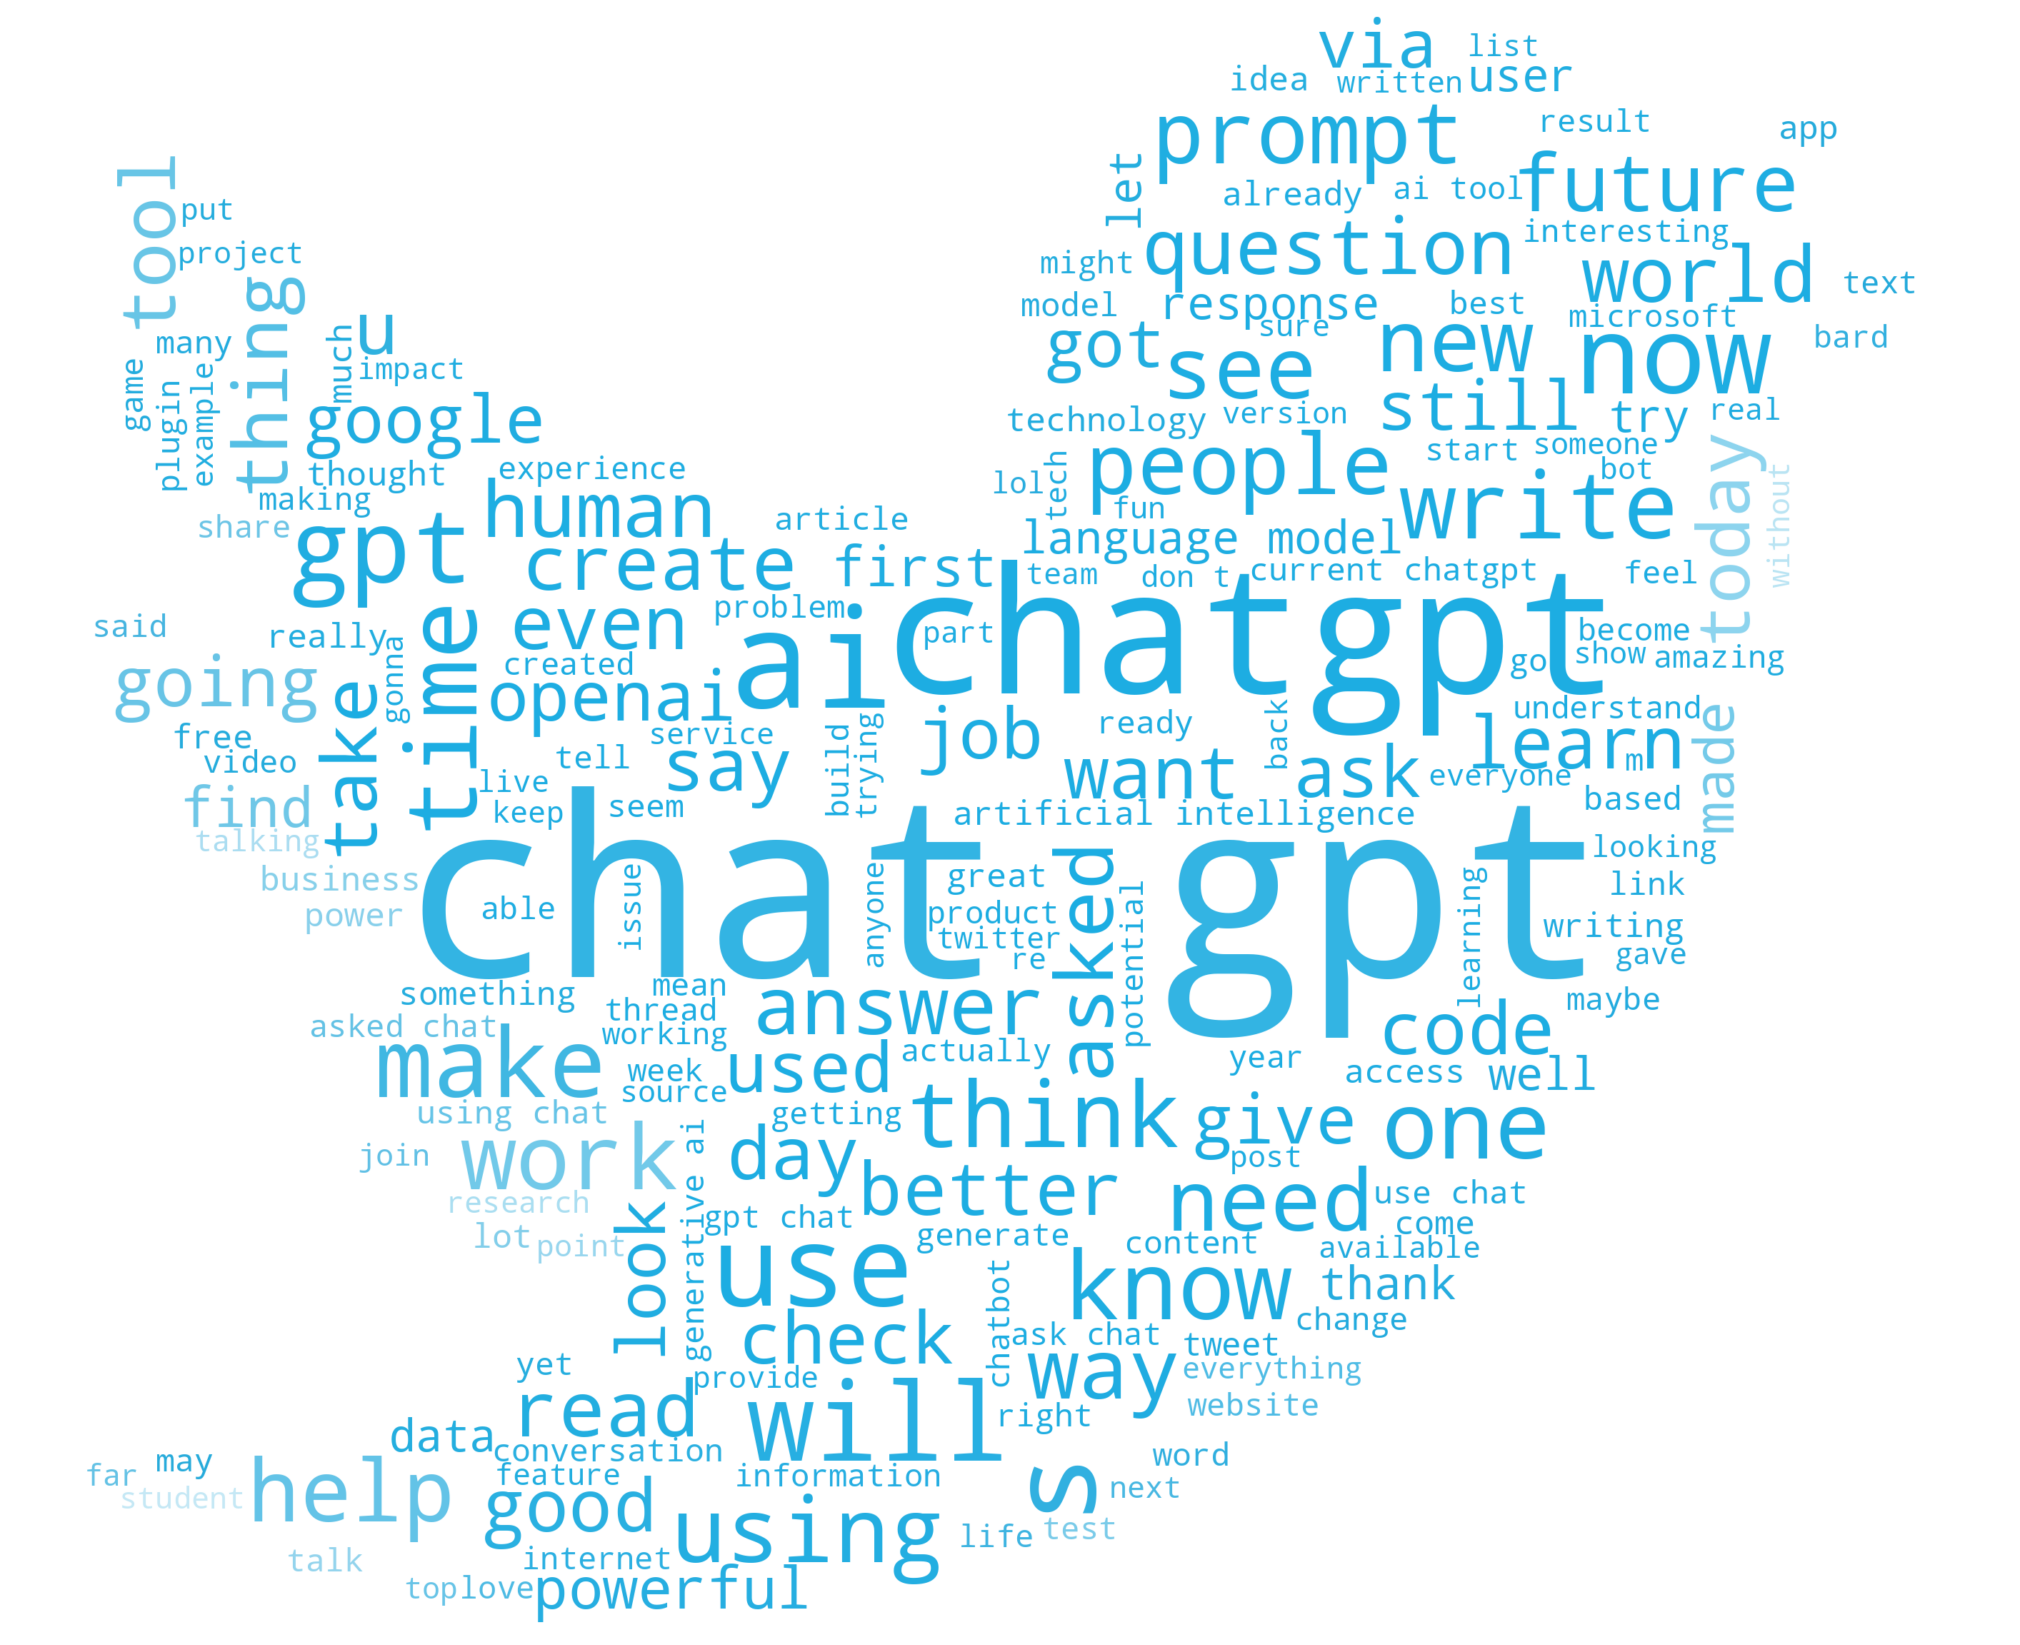

In [40]:
# Generate a word cloud image
mask = np.array(Image.open("/content/twitter_logo1.jpg"))
stopwords = set(STOPWORDS)

wordcloud_twitter = WordCloud(height=2000,
                              width=2000,
                              background_color="white",
                              mode="RGBA",
                              stopwords=stopwords,
                              mask=mask).generate(all_words_lem)

# Create coloring from the image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter.recolor(color_func=image_colors), interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_logo_unigram_words.png", format="png")

plt.show()

In [41]:
# Retrieves all occurrences of @+text
df['mentions'] = df['text'].str.findall(r'@\w+')
# Removes the @ in front
df['mentions'] = [list(map(lambda x: x[1:], mentions)) for mentions in df['mentions']]
# Converts the list of words in each row to a string
df['mentions_string'] = df['mentions'].apply(lambda x: ' '.join(x))
# Concatenates all strings in one string
all_mentions = ' '.join([word for word in df['mentions_string']])

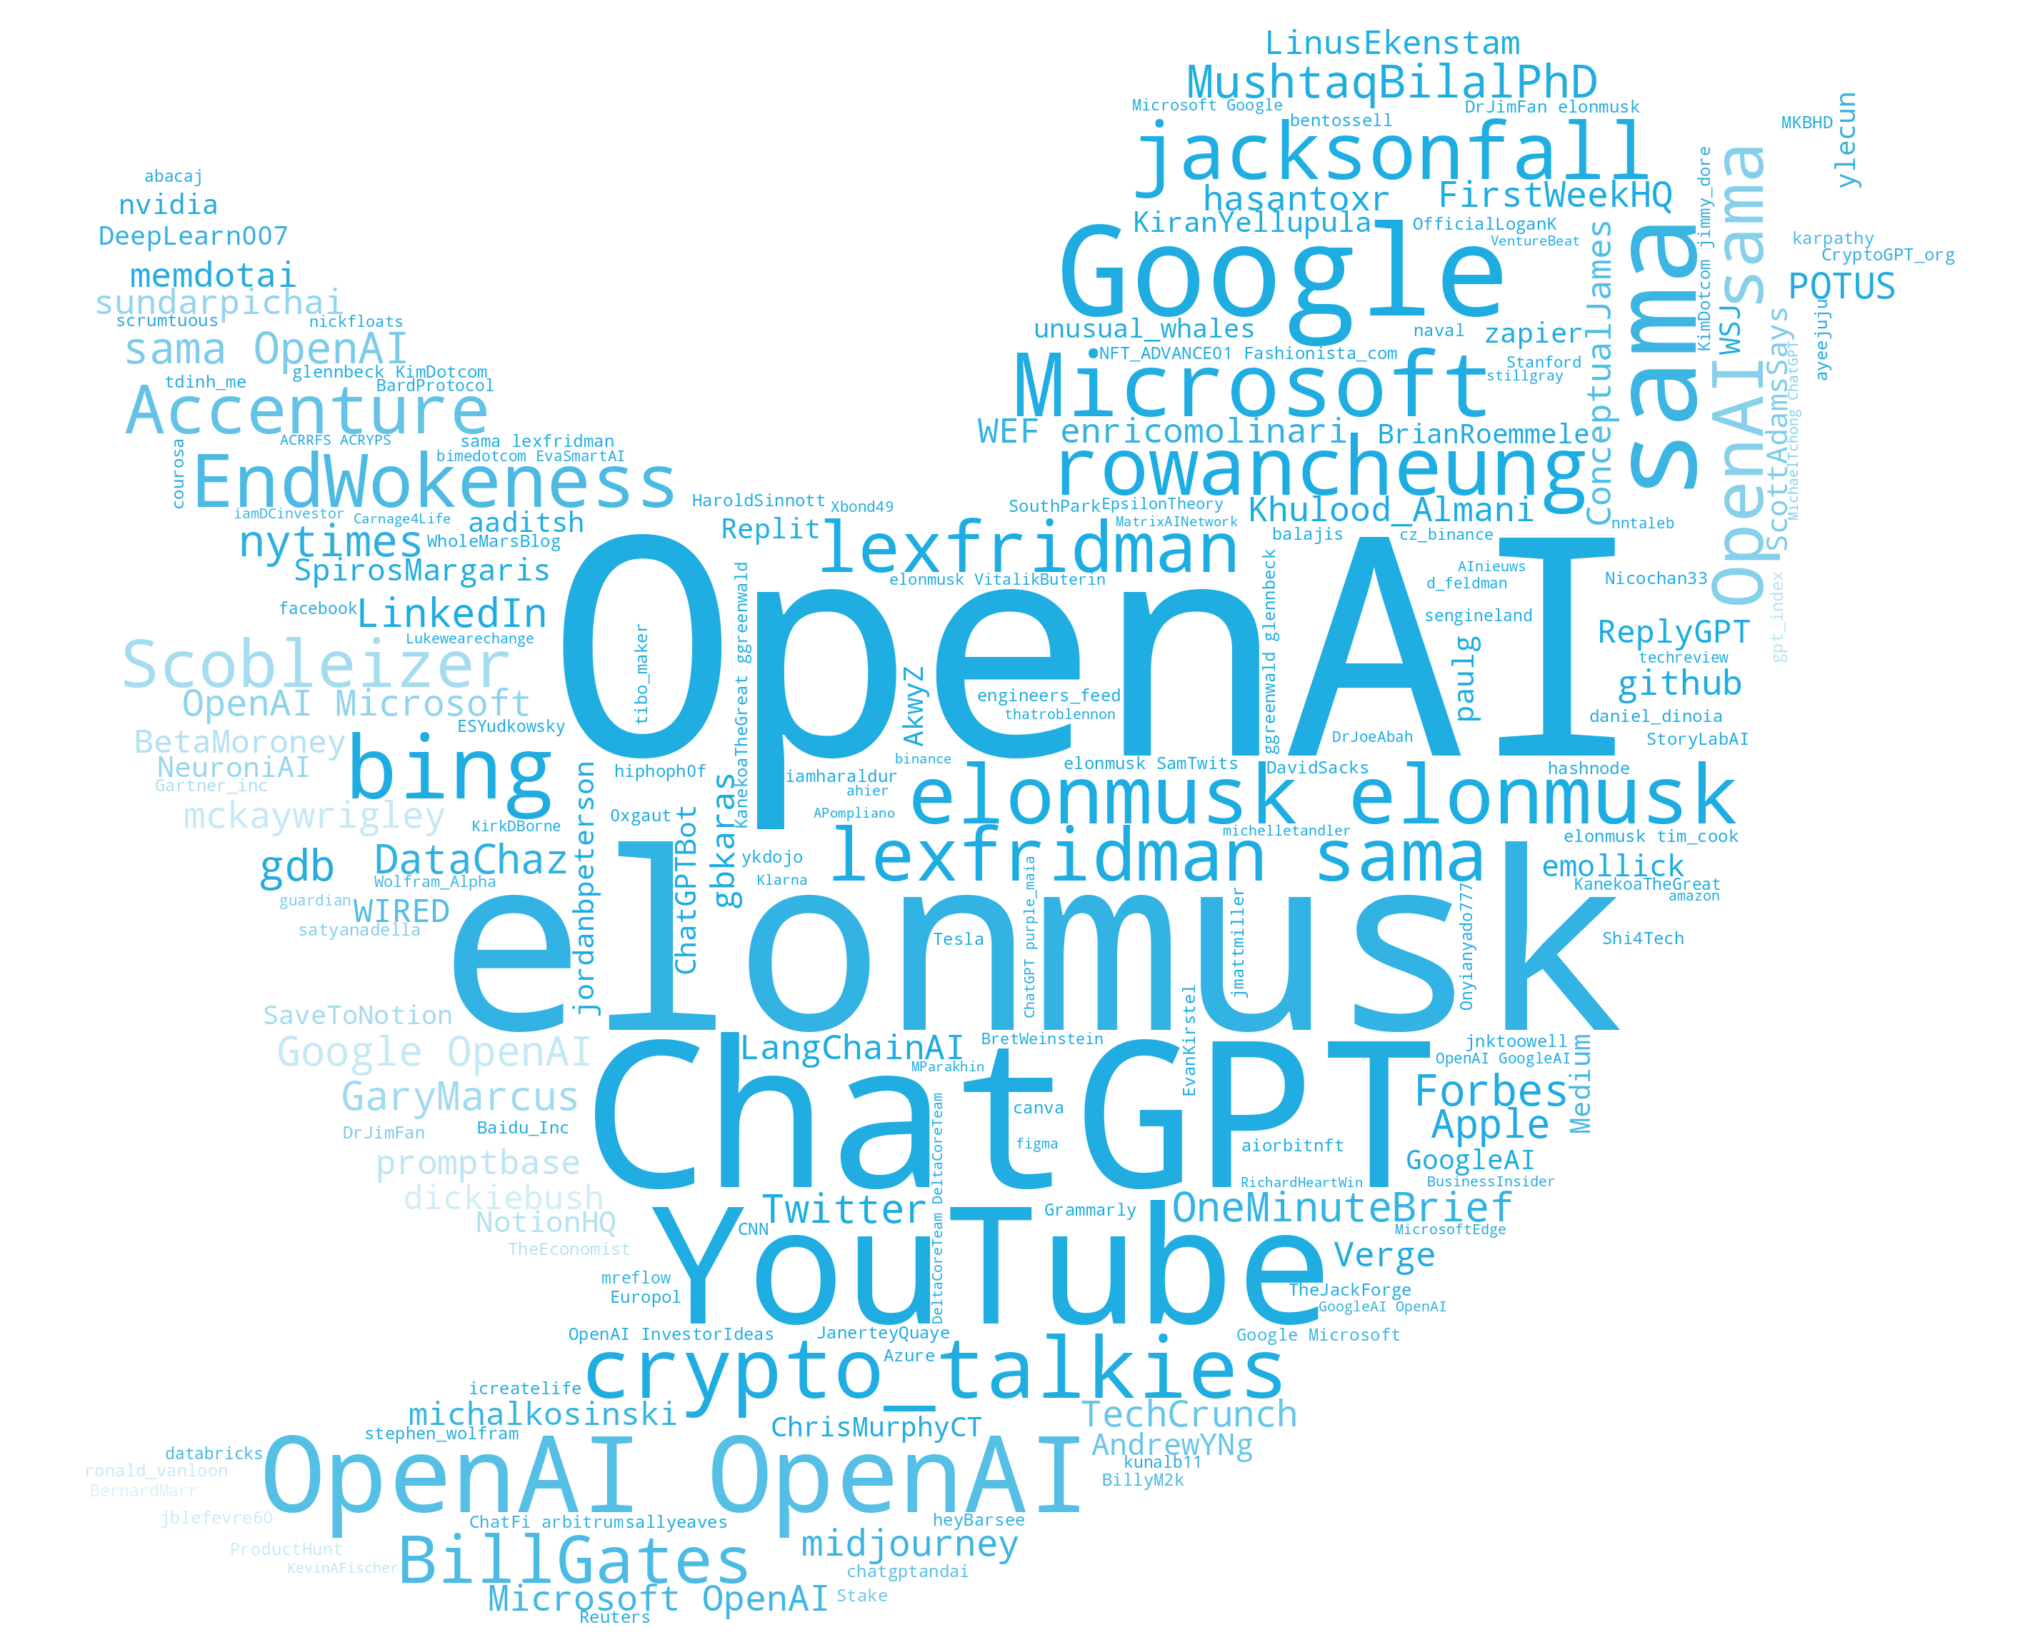

In [42]:
wordcloud_twitter = WordCloud(height=2000,
                              width=2000,
                              background_color="white",
                              mode="RGBA",
                              stopwords=stopwords,
                              mask=mask).generate(all_mentions)

# Create coloring from the image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter.recolor(color_func=image_colors), interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_logo_unigram_mentions.png", format="png")

plt.show()

In [43]:
# Retrieves all occurrences of #+text
df['hashtags'] = df['text'].str.findall(r'#\w+')
# Removes the @ in front
df['hashtags'] = [list(map(lambda x: x[1:], hashtags)) for hashtags in df['hashtags']]
# Converts the list of words in each row to a string
df['hashtags_string'] = df['hashtags'].apply(lambda x: ' '.join(x))
# Concatenates all strings in one string
all_hashtags = ' '.join([word for word in df['hashtags_string']])

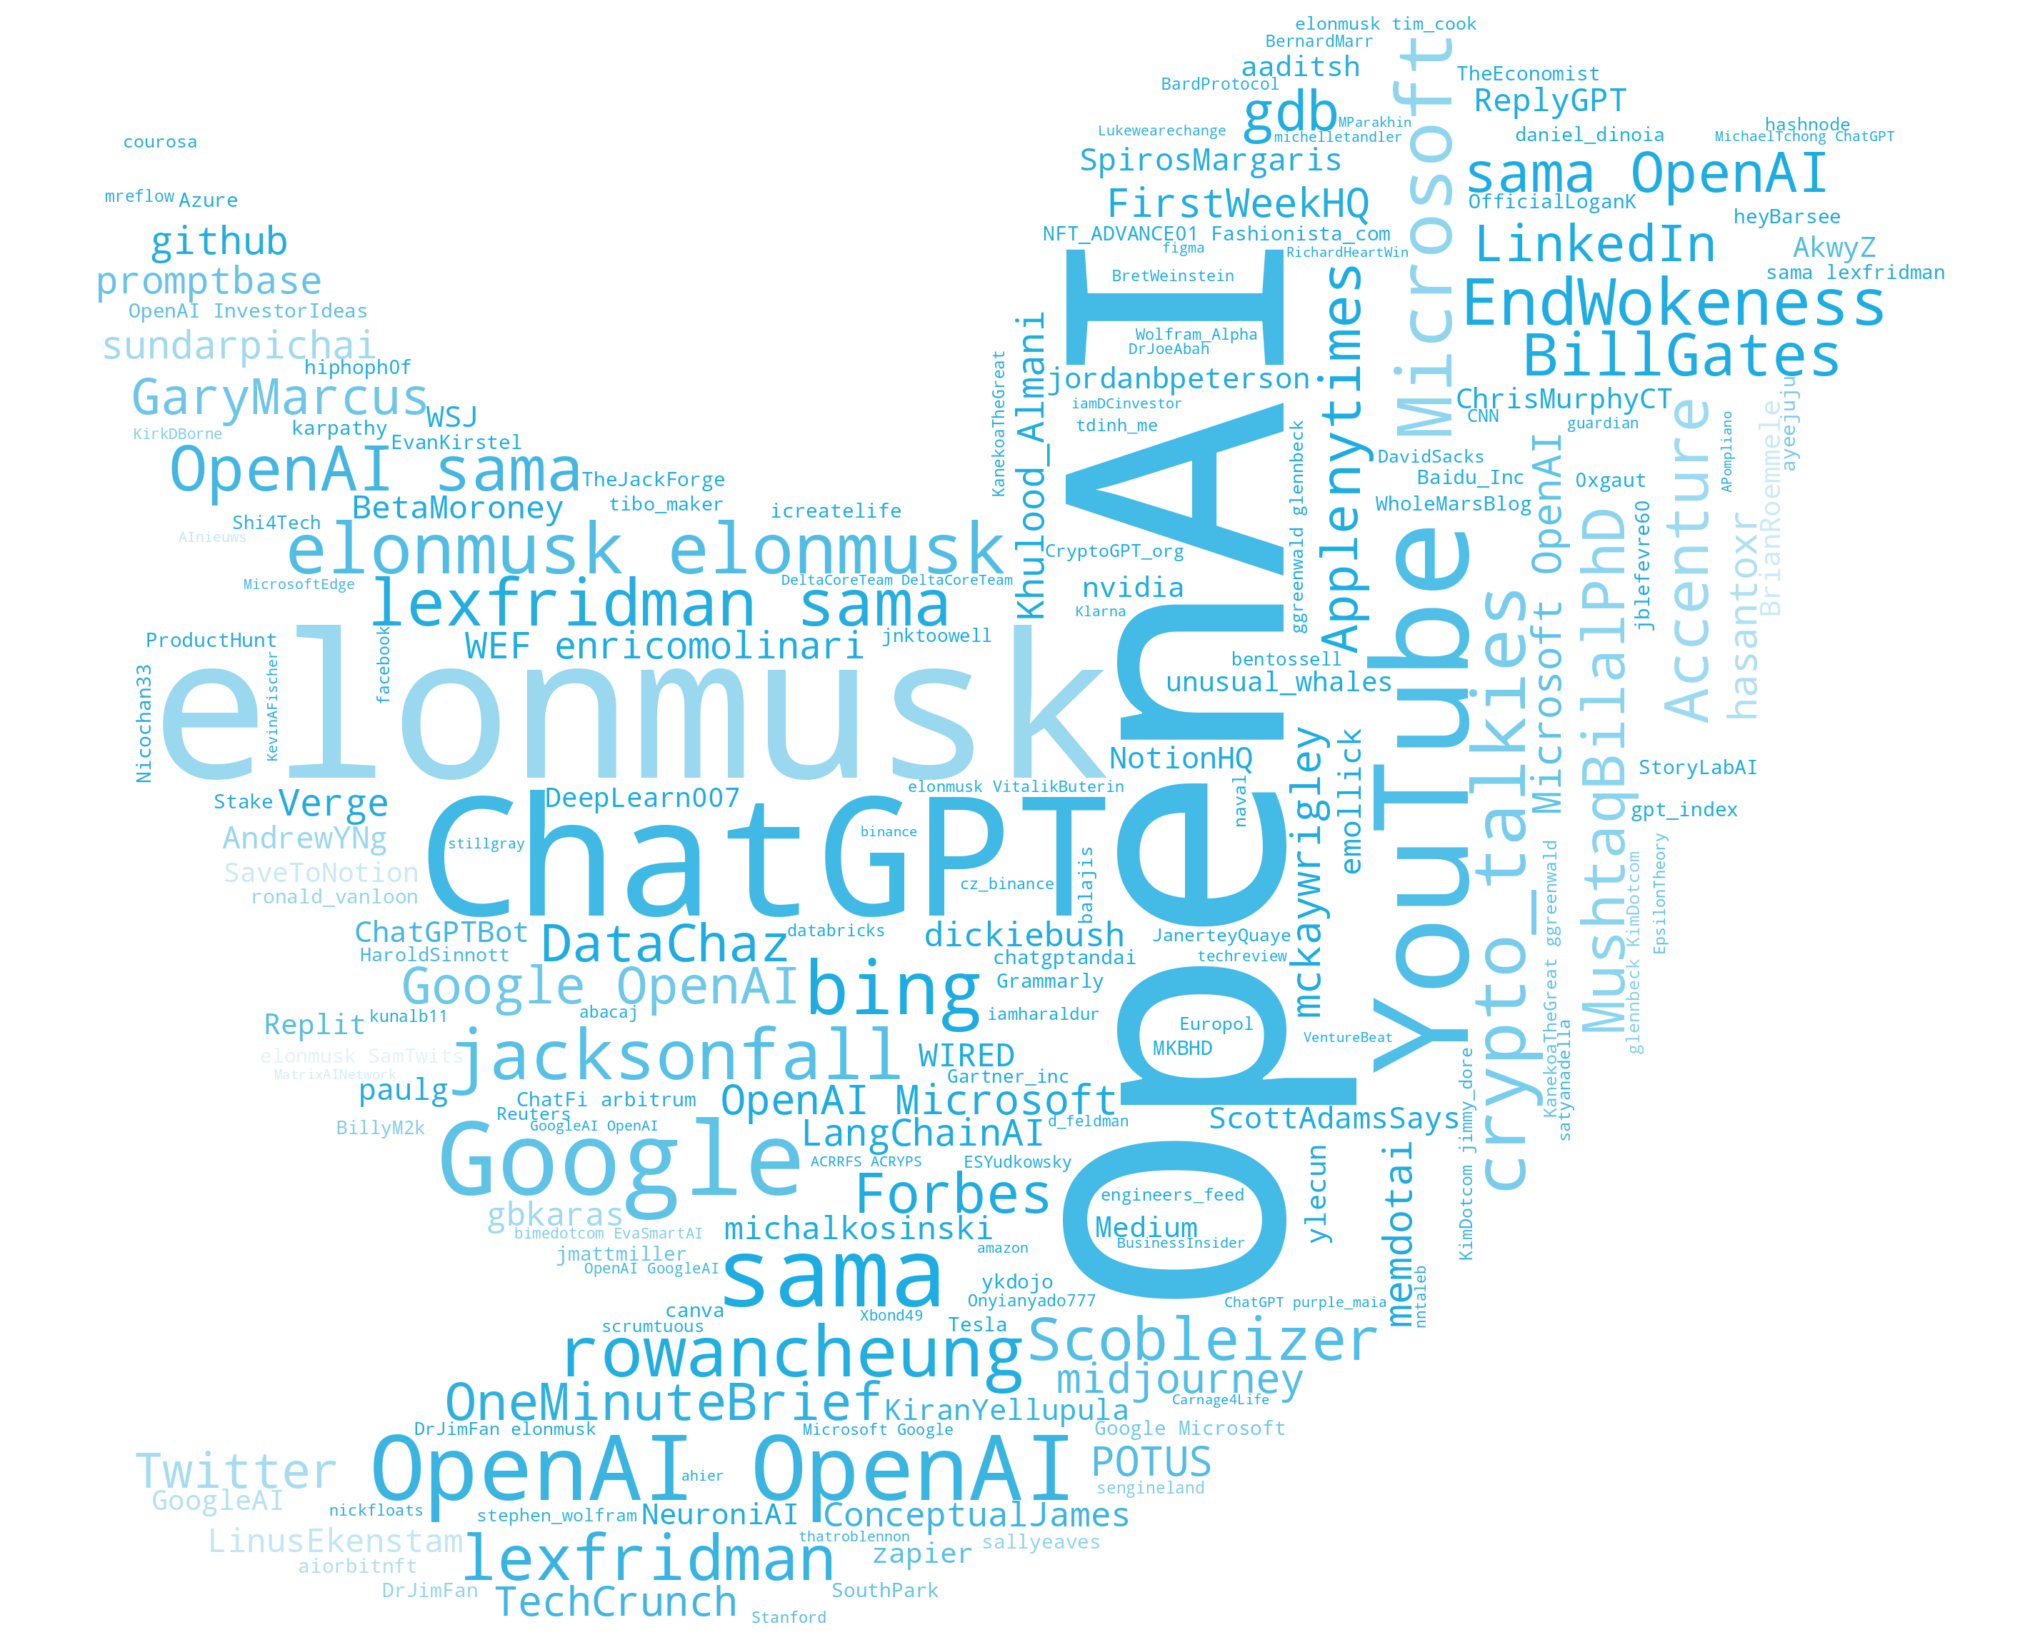

In [45]:
wordcloud_twitter = WordCloud(height=2000,
                              width=2000,
                              background_color="white",
                              mode="RGBA",
                              stopwords=stopwords,
                              mask=mask).generate(all_mentions)

# Create coloring from the image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter.recolor(color_func=image_colors), interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_logo_unigram_hashtags.png", format="png")

plt.show()

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df['vader_polarity'] = df['processed_text'].map(
    lambda text: sid.polarity_scores(text)['compound']) 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [49]:
from textblob import TextBlob

df['blob_polarity'] = df['processed_text'].map(
    lambda text: TextBlob(text).sentiment.polarity)

In [50]:
df.head(1)

id                                               text  \
0  1641159430405324800  Henry Lai unpacks the data-centric AI techniqu...   

                                      processed_text  \
0  henry lai unpacks the data-centric ai techniqu...   

                                            text_lem mentions mentions_string  \
0  henry lai unpacks the data-centric ai techniqu...       []                   

  hashtags hashtags_string  vader_polarity  blob_polarity  
0       []                             0.0            0.0

In [51]:
polarity_df = df[['vader_polarity', 'blob_polarity']]
polarity_df = polarity_df.rename(columns={'vader_polarity': 'Vader',
                                          'blob_polarity': 'TextBlob'})

fig = px.histogram(polarity_df, x=['Vader', 'TextBlob'], nbins=40, barmode='group', color_discrete_sequence=['#1DA1F2', '#EB8C17'])
fig.update_layout(title='Comparison of the distributions of sentimental polarities', xaxis_title='Polarity', yaxis_title='Count')
fig.show()

In [53]:
def pre_process1(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)

    # text = re.sub(r'@\w+', '', text)
    # text = re.sub(r'#\w+', '', text)
    text = re.sub(r'@\w+', lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.group(0)), text)
    text = re.sub(r'#\w+', lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.group(0)), text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()
    return text

In [55]:
df['processed_text_@_#'] = df['text'].apply(pre_process1)

In [56]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

df['stop_text'] = df['processed_text_@_#'].apply(lambda x: remove_stop_words(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
# We define a list of topics
topics = ['ai', 'gpt', 'chatgpt', 'chat gpt', 'elonmusk', 'openai','jordanbpeterson','lexfridman','mushtaqbilalphd', 'google', 'sama', 'microsoft' ,'youtube', 
'billgates', 'linkedin', 'bing', 'rowancheung', 'oneminutebrief', 'midjourney', 'jacksonfall']

In [57]:
# We create a new column Topic
df['Topic'] = ""
for topic in topics:
    df.loc[df['stop_text'].str.contains(topic), 'Topic'] = topic

# We create a new DataFrame with columns topic / sentiment / source
data = []
for topic in topics:
    topic_rows = df[df['Topic'] == topic]
    # Average sentiment per topic
    vader_sentiments = topic_rows['vader_polarity'].sum() / topic_rows.shape[0]
    textblob_sentiments = topic_rows['blob_polarity'].sum() / topic_rows.shape[0]
    # Append data
    data.append({'Topic': topic, 'Sentiment': vader_sentiments, 'Source': 'Vader'})
    data.append({'Topic': topic, 'Sentiment': textblob_sentiments, 'Source': 'TextBlob'})

df_new = pd.DataFrame(data)

In [58]:
# Plot the sentiment for each topic
fig = px.bar(df_new,
             x='Topic',
             y='Sentiment',
             color='Source',
             barmode='group',
             color_discrete_sequence = ['#1DA1F2', '#EB8C17'],
             title='Comparative sentimental analysis by topic',
             template='plotly_white')

fig.update_traces(marker_line_width=1,
                  marker_line_color="black")

fig.show()

In [59]:
usernames = ['@elonmusk', '@OpenAI', '@lexfridman','@MushtaqBilalPhD', '@bing', '@Google', '@jacksonfall' , '@rowancheung', '@sama', '@Accenture', '@crypto_talkies', '@BillGates', '@Microsoft', '@nytimes', '@LinkedIn', '@Forbes', '@Apple']
vader_sentiments = df['vader_polarity'].tolist()
textblob_sentiments = df['blob_polarity'].tolist()
text = df['text'].tolist()

# create a new column for the username
df['Mention'] = ""
for username in usernames:
    df.loc[df['text'].str.contains(username), 'Mention'] = username

# create a new dataframe with columns for username, sentiment, and sentiment source
data = []
for username in usernames:
    username_rows = df[df['Mention'] == username]
    vader_sentiments = username_rows['vader_polarity'].sum() / username_rows.shape[0]
    textblob_sentiments = username_rows['blob_polarity'].sum() / username_rows.shape[0]
    data.append({'Mention': username, 'Sentiment': vader_sentiments, 'Source': 'Vader'})
    data.append({'Mention': username, 'Sentiment': textblob_sentiments, 'Source': 'TextBlob'})
df_new = pd.DataFrame(data)

# plot the sentiment for each username using Plotly
fig = px.bar(df_new,
             x='Mention',
             y='Sentiment',
             color='Source',
             barmode='group',
             color_discrete_sequence = ['#1DA1F2', '#EB8C17'],
             title='Comparative sentimental analysis by accounts',
             template='plotly_white')

fig.update_traces(marker_line_width=1,
                  marker_line_color="black")

fig.show()